In [1]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u

C:\Users\Nick Landing\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\config\__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to C:\Users\Nick Landing\.lightkurve\cache. Please move all the files in the legacy directory C:\Users\Nick Landing\.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [16]:
# Search for your target using its TIC ID 
TIC = 'TIC 737546' 

In [17]:
# Check the availability of the data for this target
available_data_all = lk.search_lightcurve(TIC);

In [18]:
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 05,2018,SPOC,120,737546,0.0
1,TESS Sector 05,2018,TESS-SPOC,1800,737546,0.0
2,TESS Sector 32,2020,TESS-SPOC,600,737546,0.0
3,TESS Sector 05,2018,QLP,1800,737546,0.0
4,TESS Sector 32,2020,QLP,600,737546,0.0
5,TESS Sector 05,2018,TASOC,120,737546,0.0
6,TESS Sector 05,2018,GSFC-ELEANOR-LITE,1800,737546,0.0
7,TESS Sector 05,2018,TASOC,1800,737546,0.0
8,TESS Sector 05,2018,TASOC,1800,737546,0.0


In [19]:
# Search for and download the light curve
search_result = lk.search_lightcurve(TIC, sector=5, author="SPOC")
sector1b = search_result.download_all()
sector1 = sector1b.stitch().remove_nans()

# Search for and download the light curve
search_result = lk.search_lightcurve(TIC, sector=32,author="TESS-SPOC")
sector2b = search_result.download_all()
sector2 = sector2b.stitch().remove_nans()

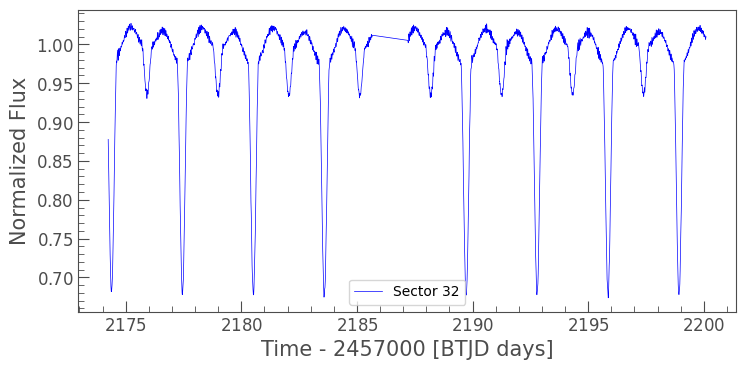

In [20]:
# Plot the light curves with the desired colors and highlighted sectors
ax =sector2.plot(label='Sector 32', color='blue');
%matplotlib inline
ax.legend();

In [21]:
collect_lc = lk.LightCurveCollection([sector1,sector2]).stitch();

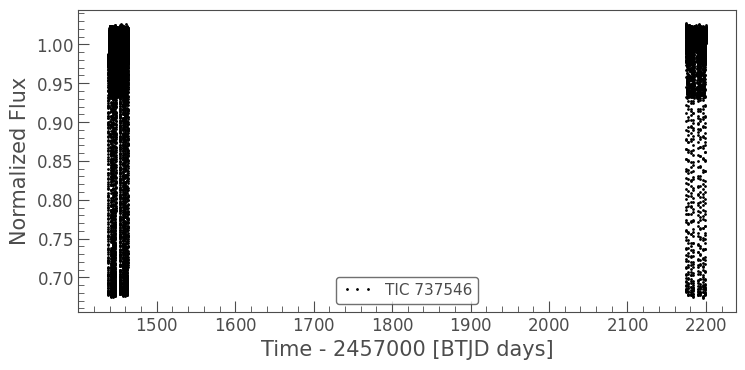

In [22]:
collect_lc.plot(color = 'black', lw = 0, marker = '.');

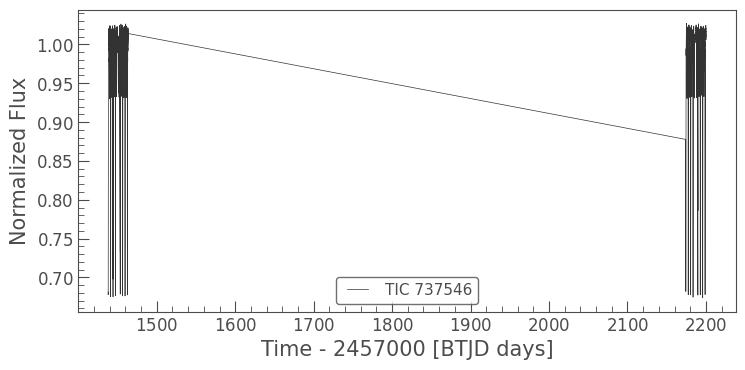

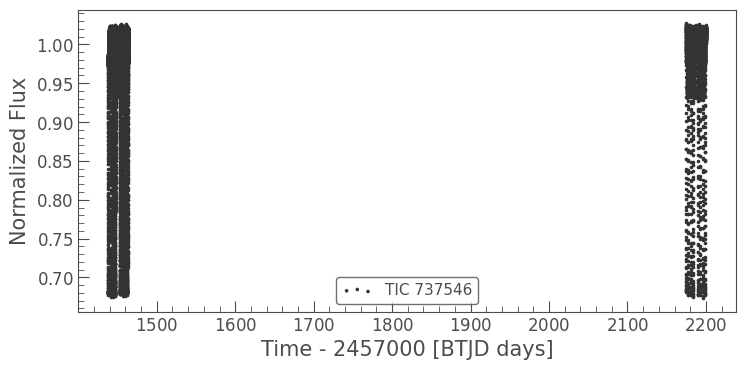

In [23]:
mask = (collect_lc.time.value < 3100)&(collect_lc.time.value > 1)
masked_lc=collect_lc[mask];
masked_lc.plot();
masked_lc.scatter(s=10);


In [24]:
#Querying if there is a solar system object in the first half
df_sso1 = masked_lc.query_solar_system_objects(cadence_mask=(masked_lc.time.value >= 3500) & (masked_lc.time.value <= 1)) 
print(df_sso1)

None


`period` contains 1139075 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


Period at max power = 3.080680680680681 d
BLS max power = 18768.153924879058
Epoch = 1441.1332628713665
----------------------------------------
Period at second max power = 1.5341341341341344 d
BLS max power = 30044.5292631536
Epoch = 1439.5482628713664
----------------------------------------
Period at third max power = 9.205005005005006 d
BLS max power = 190926.14010857345
Epoch = 1444.1982628713663
----------------------------------------
Period at fourth max power = 9.163763763763765 d
BLS max power = 250036.5922183634
Epoch = 1438.2532628713664
----------------------------------------
Period at fifth max power = 6.111911911911913 d
BLS max power = 124907.52993509761
Epoch = 1441.1232628713663
----------------------------------------
Period at sixth max power = 6.215015015015015 d
BLS max power = 61347.28665068613
Epoch = 1444.0232628713663
----------------------------------------
Period at seventh max power = 3.0600600600600605 d
BLS max power = 537831.2842701648
Epoch = 1440.003

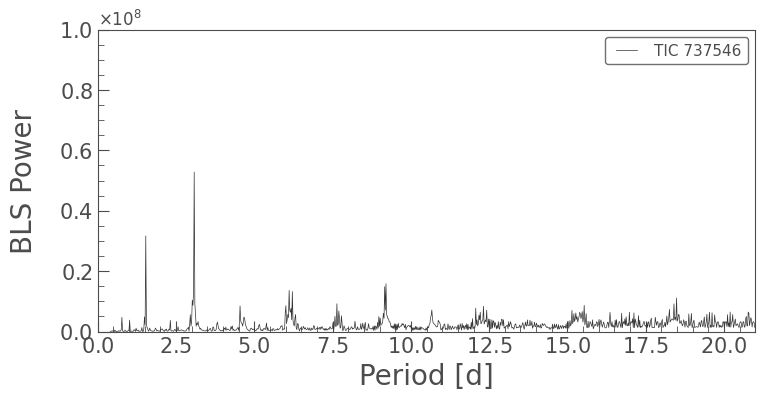

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 21, 1000)
bls = masked_lc.to_periodogram(method='bls', period=period,frequency_factor=25)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 21)
plt.ylim([0, 100000000])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
epoch = bls.transit_time
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_epoch = epoch[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
#Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
print('Period at max power =', periods[np.argmax(powers)])
print('BLS max power =', np.max(powers[0]))
print('Epoch =', sorted_epoch[0])
print('----------------------------------------')
print('Period at second max power =', sorted_periods[1])
print('BLS max power =', np.max(powers[1]))
print('Epoch =', sorted_epoch[1])
print('----------------------------------------')
print('Period at third max power =', sorted_periods[2])
print('BLS max power =', np.max(powers[2]))
print('Epoch =', sorted_epoch[2])
print('----------------------------------------')
print('Period at fourth max power =', sorted_periods[3])
print('BLS max power =', np.max(powers[3]))
print('Epoch =', sorted_epoch[3])
print('----------------------------------------')
print('Period at fifth max power =', sorted_periods[4])
print('BLS max power =', np.max(powers[4]))
print('Epoch =', sorted_epoch[4])
print('----------------------------------------')
print('Period at sixth max power =', sorted_periods[5])
print('BLS max power =', np.max(powers[5]))
print('Epoch =', sorted_epoch[5])
print('----------------------------------------')
print('Period at seventh max power =', sorted_periods[6])
print('BLS max power =', np.max(powers[6]))
print('Epoch =', sorted_epoch[6])
print('----------------------------------------')
print('Period at eighth max power =', sorted_periods[7])
print('BLS max power =', np.max(powers[7]))
print('Epoch =', sorted_epoch[7])
print('----------------------------------------')
print('Period at ninth max power =', sorted_periods[8])
print('BLS max power =', np.max(powers[8]))
print('Epoch =', sorted_epoch[8])
print('----------------------------------------')
#Choose which power you want done here
print('Period at Fifteenth max power =', sorted_periods[14])
print('BLS max power =', np.max(powers[14]))
print('Epoch =', sorted_epoch[14])
print('----------------------------------------')

(0.6, 1.1)

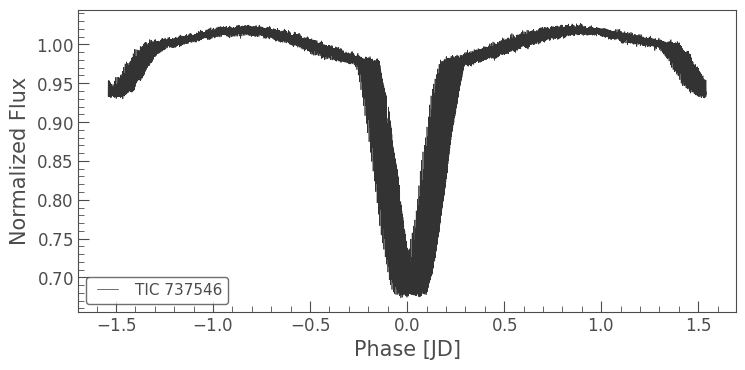

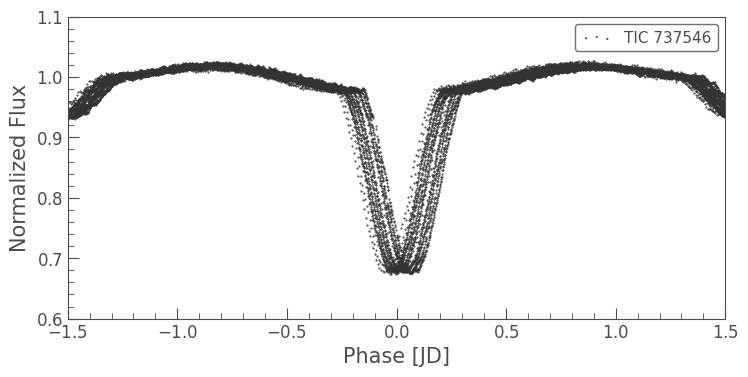

In [31]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
period = 3.080680680680681
epoch_time =  1441.1332628713665
folded_lc = masked_lc.fold(period, epoch_time=epoch_time)
folded_lc.plot();
folded_lc.scatter(s=1);
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.5,1.5)
plt.ylim([0.6,1.1])

(0.6, 1.1)

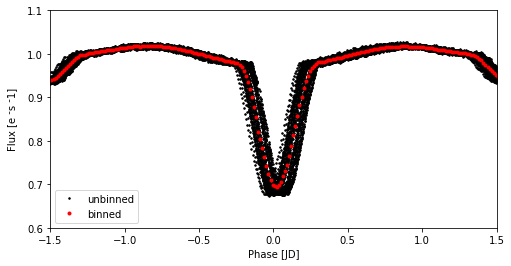

In [32]:
period  = period
t0 = epoch_time

folded2_lc = masked_lc.fold(period, epoch_time=epoch_time)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/15)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.5,1.5)
plt.ylim([0.6,1.1])

In [33]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  0.6936461925506592
median flux = 0.9992136359214783
Tdepth =  0.3055674433708191
Tdepth in ppm =  305567.4433708191 ppm
Rp/Rs ratio =  0.552781551221474


In [34]:
planet_b_period = period
planet_b_t0 = epoch_time
planet_b_dur = bls.duration[0]
print(planet_b_period)
print(planet_b_t0)
print(planet_b_dur)

3.080680680680681
1441.1332628713665
0.2 d


In [35]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 4.800000000000001 d hours


In [36]:
#Transit depth from bls model
planet_b_depth = bls.depth[0]
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  0.0019864892750830754
depth in ppm = 1986.4892750830754 ppm


In [37]:
P = planet_b_period * 24 * 60 * 60  # planet's period
G = 6.674 * 10 ** -11  # gravitational constant
Msun = 1.98847 * 10 ** 30  # Sun mass
M = 1.56 * Msun  # Star's mass
Mpositve = M+0.190658
Mnegative = M-0.190658
pi = math.pi
a = ((P ** 2) / ((4 * pi ** 2) / (G * M))) ** (1 / 3)  # Orbital radius or semi-major axis
au = a / 1000 * 0.000000006684587  # Orbital Radius AU
AKM = a / 1000  # Orbital Radius KM
print('Orbital Radius')
print('a =', a, 'm')
print('a =', AKM, 'km')
print('a =', au, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 7188920055.842702 m
a = 7188920.055842702 km
a = 0.0480549615493254 AU
The planetary mass was neglected


In [38]:
L = 31.88422 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')
if au <= ri and au >= ro:
    print("In the Habitable Zone")
else:
    print("Not in the Habitable Zone")

The inner boundary of the habitable zone ri = 5.383832700358969 AU
The outer boundary of the habitable zone ro = 7.756217226224222 AU
Not in the Habitable Zone


In [40]:
Rs = 3.76571 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 1449511.799719336 km
Rp= 227.5171558184486 Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 2.741545381586647


In [41]:
P = planet_b_period * 24 * 60 * 60
pi = math.pi
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 169700.48944046313 m/s


In [42]:
print('Period = ',planet_b_period)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')
print('BJD = ',epoch_time +2457000)

Period =  3.080680680680681
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  6.0 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  0.3055674433708191
Transit depth in ppm =  305567.4433708191 ppm
Transit Depth from bls model in ppm = 1986.4892750830754 ppm
Rp/Rs ratio =  0.552781551221474
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 1449511.799719336 km
Rp= 227.5171558184486 Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 7188920055.842702 m
a = 7188920.055842702 km
a = 0.0480549615493254 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 2.741545381586647
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 169700.48944046313 m/s
- - - - - - - - - - - - - - - - - - - - 
BJD =  2458441.1332628713


In [43]:
import cmath
#Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (int(planet_b_dur) ** (2))) ** (1/2)
print('Total transit duration T14 Tt =', Tt)
print('Tt in hours =', Tt * 24, 'hours')
#Calculation of the impact parameter b for eccentricity e=0
#b = (( ((1-(Tdepth **(1/2)))**(2)-(planet_b_dur/Tt)**(2))* (1+(Tdepth **(1/2)))**(2)  ) / (1 - (planet_b_dur/Tt)**(2) ) ) ** (1/2)
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(planet_b_dur/Tt)**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (planet_b_dur/Tt)**(2) ))
print('Impart parameter b =', b)
#Calculation of inclination
i = cmath.acos(b*(Rs*Rsun)/(a/1000))
print('Inclination i =', 90-i, 'deg')

TypeError: only dimensionless scalar quantities can be converted to Python scalars

In [1]:
#Astroseimology

In [2]:
import lightkurve as lk
import numpy as np
%matplotlib inline

C:\Users\Nick Landing\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\config\__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to C:\Users\Nick Landing\.lightkurve\cache. Please move all the files in the legacy directory C:\Users\Nick Landing\.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [16]:
search_result = lk.search_lightcurve('TIC 180672438',sector=(49),author="SPOC")
lc = search_result.download_all().stitch()

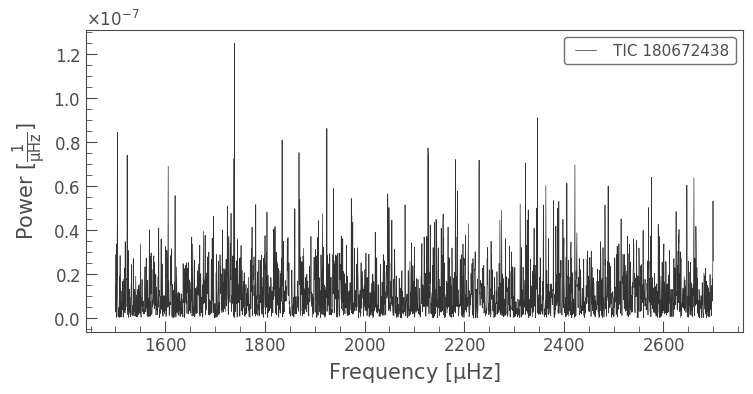

In [17]:
pg = lc.to_periodogram(normalization='psd',
                       minimum_frequency=1500,
                       maximum_frequency=2700)
ax = pg.plot();

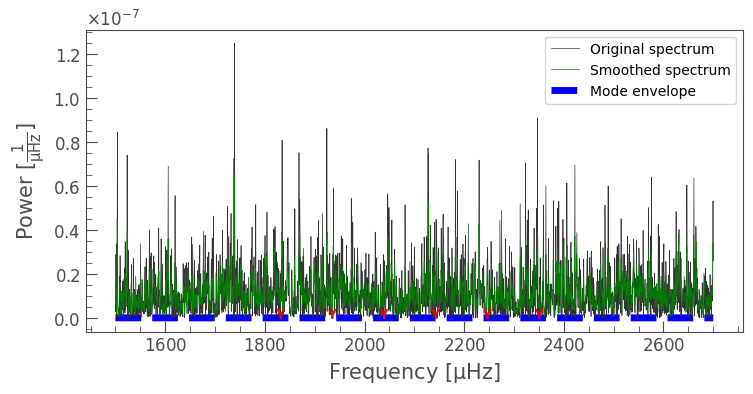

In [18]:
# Plot a smoothed version of the power spectrum on top in green
ax = pg.plot(label='Original spectrum')
pg.smooth(filter_width=1).plot(ax=ax,
                               color='green',
                               label='Smoothed spectrum')

# Highlight the "mode envelope" using a Gaussian curve
f = pg.frequency.value
ax.plot(f, 5e-11*np.exp(-(f-2100)**2/(2*230**2)),
        lw=5, ls='--', zorder=0,
        color='blue', label='Mode envelope');

# Annotate the modes using red arrows
for i in range(6):
  ax.annotate('',
              xy=(1831.66+i*103.8, 5.2e-11),
              xytext=(1831.66+i*103.8, 7e-11),
              arrowprops=dict(arrowstyle='->',
              color='red',
              linewidth=1.5))
ax.legend();

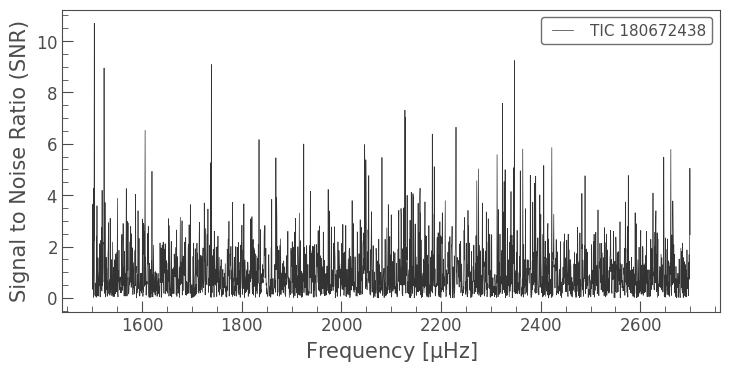

In [19]:
snr = pg.flatten()
ax = snr.plot();

In [20]:
seismology = snr.to_seismology()

In [21]:
seismology.estimate_numax()

numax: 2245.00 uHz (method: ACF2D)

In [22]:
seismology.numax.value

2245.0

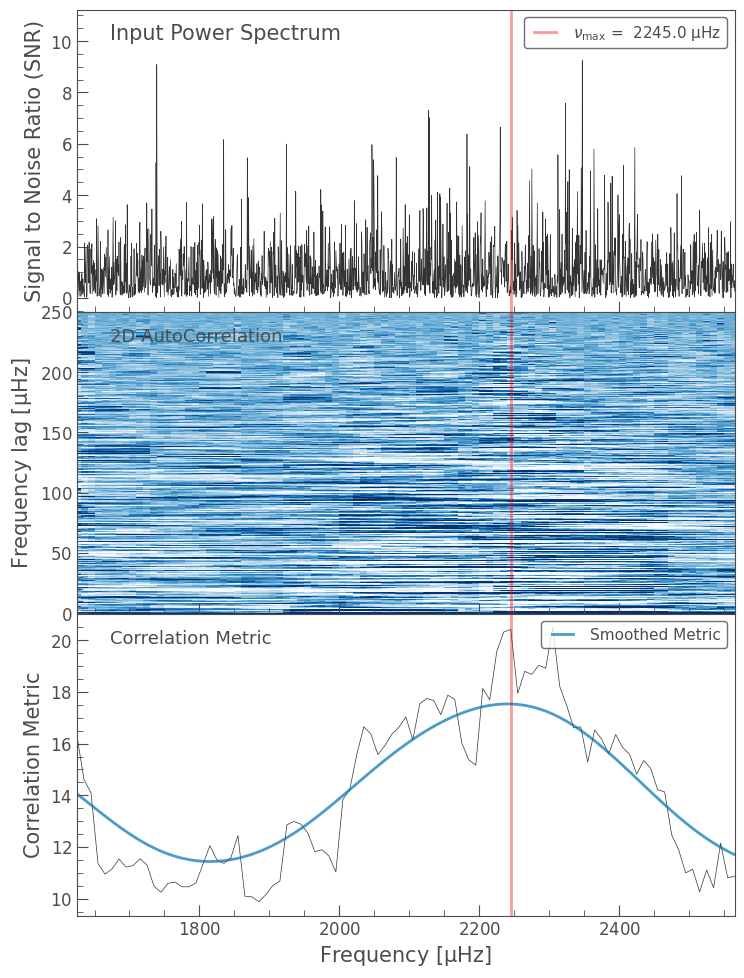

In [23]:
seismology.diagnose_numax();

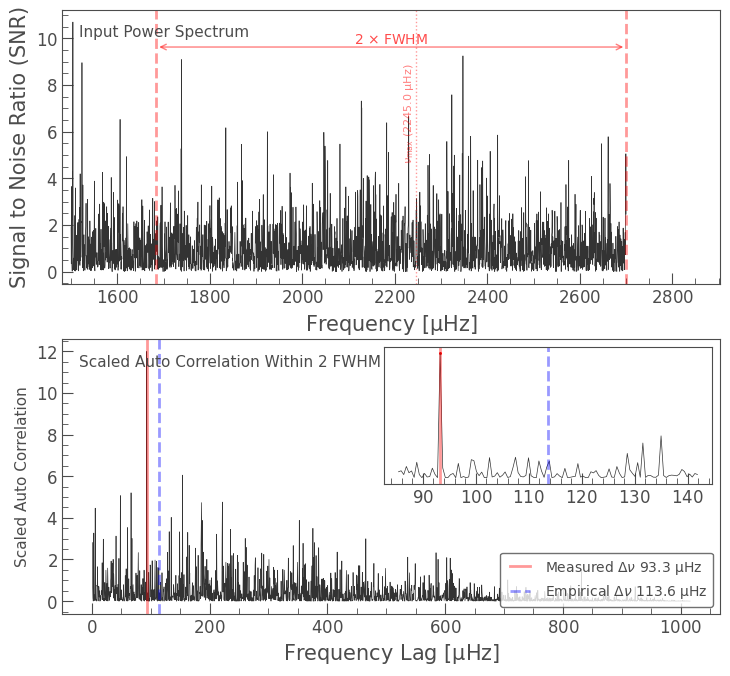

In [24]:
seismology.estimate_deltanu();
seismology.diagnose_deltanu();

In [25]:
seismology.estimate_mass()

mass: 1.76 solMass (method: Uncorrected Scaling Relations)

In [26]:
seismology.estimate_radius()

radius: 1.55 solRad (method: Uncorrected Scaling Relations)

In [27]:
seismology.estimate_logg()

logg: 4.31 dex (method: Uncorrected Scaling Relations)

In [28]:
seismology

Seismology(ID: TIC 180672438) - computed values:
 * numax: 2245.00 uHz (method: ACF2D)
 * deltanu: 93.26 uHz (method: ACF2D)
 * mass: 1.76 solMass (method: Uncorrected Scaling Relations)
 * radius: 1.55 solRad (method: Uncorrected Scaling Relations)
 * logg: 4.31 dex (method: Uncorrected Scaling Relations)

In [27]:
#False Positive Checkeer
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np

In [ ]:
search_result = lk.search_targetpixelfile(TIC, author="SPOC", sector=4)
tpf = search_result[3].download()
tpf.plot(aperture_mask='pipeline')
sector_data = lk.search_lightcurve(TIC, author = 'TESS-SPOC', sector = 31)
lc = sector_data.download()


lc.plot(linewidth = 0, marker = '.', color = 'green', alpha = 0.9)

In [ ]:
###Check the Background Flux at the Time of Transit###
######################################################
transit_time = epoch_time

# generate a mask so that we only see the times around the transit event
# in this example we are looking at 2 days on either side of the event but you can CHANGE THIS depending on the signal.
transit_mask = (lc.time.value > transit_time - 2) & (lc.time.value < transit_time + 2)

# generate the figure
fig, ax = plt.subplots(figsize = (8,3))

# mask the date (both the time and the flux using the mask we just generated)
plt.plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

plt.axvline(transit_time) # plot a vertical line at the time of the transi event!

plt.ylabel("Background flux") # label the axes
plt.xlabel("Time (TJD)")
plt.tight_layout()
plt.show()

# define a plotting region with two parts
fig, ax = plt.subplots(2,1, sharex = True)

#plot the flux on the first axes and the background flux on the second
#crop both data sets using the mask that we defined in the cell above
ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'k', lw = 0, marker = '.', ms = 1)
ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

#plot a line at the time of the transit event on both plots
ax[0].axvline(transit_time, color = 'orange', zorder = -1)
ax[1].axvline(transit_time, color = 'orange', zorder = -1)

ax[0].set_ylabel("Flux")
ax[1].set_ylabel("Background flux")
ax[1].set_xlabel("Time (TJD)")
plt.show()

In [ ]:
def plot_in_out_TPF(tpf,  T0):

    tpf_list = [tpf.flux.value]
    t_list = [tpf.time.value]
    T0_list = [T0]
    
    plt.figure(figsize=(9,2.5*len(T0_list)))

    plt.tight_layout()

    count = 0 # keep track of how many images have been plotted to that they appear on a subgrid of plots which has three columns

    # loop through all of the list of PCA corrected flux vs time arrays for each marked transit-event
    for idx, tpf_filt in enumerate(tpf_list): # idx is for each maked transit-event

        T0 = T0_list[idx] # the time of the transit-like event
        t = t_list[idx] # the time array

        intr = abs(T0-t) < 0.25  # create a mask of the in transit times
        oot = (abs(T0-t) < 0.5) * (abs(T0-t) < 0.3)  # create a mask of the out of transit times
        img_intr = tpf_filt[intr,:,:].sum(axis=0)/float(intr.sum()) # apply the masks and normalize the flux
        img_oot = tpf_filt[oot,:,:].sum(axis=0)/float(oot.sum())
        img_diff = img_oot-img_intr # calculate the diffefence image (out of transit minus in-transit)

        
        # ---- PLOT -------

        # in transit
        count += 1 # add to the count before each plot
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_intr, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("t = {} days \n In Transit Flux (e-/candence)".format(T0), fontsize = 9 )

        # out of transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_oot, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("Out of Transit Flux (e-/candence)", fontsize = 9 )

        # out of transit minus in-transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_diff, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("Difference Flux (e-/candence)", fontsize = 9 )


    plt.subplots_adjust(wspace = 0)
    plt.tight_layout()

#plot the test for a given target
plot_in_out_TPF(tpf, transit_time)


In [ ]:
def plot_pixel_level_LC(tpf, transit_time, ql = False):
    
    transit_list = [transit_time]
    t_list = [tpf.time.value]
    tpf_list = [tpf.flux.value]
    bkg_list = [np.nanmean(tpf.flux.value,axis = 0)]
    arrshape_list = [tpf.flux.shape]

    # loop through the transits and make plot for each ( only the first is currently displayed in the pdf report)
    for idx, X1_original in enumerate(tpf_list):

        bkg = np.flip(bkg_list[idx], axis = 0)
        arrshape = arrshape_list[idx]
        peak = transit_list[idx]
        tpf = tpf_list[idx]
        
        s = X1_original.shape
        X1 = X1_original.reshape(s[0],s[1]*s[2])
        
        T0 = transit_list[idx] # the time of the transit-like event
        t = t_list[idx] # the time array

        intr = abs(T0-t) < 0.25  # create a mask of the in transit times
        oot = (abs(T0-t) < 0.5) * (abs(T0-t) < 0.3)  # create a mask of the out of transit times
        

        fig, ax = plt.subplots(arrshape[1], arrshape[2], sharex = True, sharey = False, gridspec_kw={'hspace': 0 ,'wspace': 0}, figsize=(5.5,5.5))

        plt.tight_layout()

        # see if the backrgound of this plot can be the average pixel flux (if there are too many nans this will fail and the background will just be black which is also okay)
        try:
            color = plt.cm.viridis(np.linspace(0, 1,int(np.nanmax(bkg))-int(np.nanmin(bkg))+1))
            simplebkg = False
        except:
            simplebkg = True

        for i in range(0,arrshape[1]):
            ii = arrshape[1]-1-i # we want to plot this such that the pixels increase from left to right and bottom to top

            for j in range(0,arrshape[2]):

                apmask = np.zeros(arrshape[1:], dtype=np.int64)
                apmask[i,j] = 1
                apmask = apmask.astype(bool)
                
                flux = X1[:,apmask.flatten()].sum(axis=1)

                m = np.nanmedian(flux[oot])

                normalizedflux = flux/m

                # bin the data
                f1 = normalizedflux
                time = t


                binfac = 7

                N       = len(time)
                n       = int(np.floor(N/binfac)*binfac)
                X       = np.zeros((2,n))
                X[0,:]  = time[:n]
                X[1,:]  = f1[:n]
                Xb      = rebin(X, (2,int(n/binfac)))

                # binned data
                time_binned    =    np.array(Xb[0])
                flux_binned    =   np.array(Xb[1])

                
                # create a mask that only looks at the times cut around the transit-event
                timemask = (time_binned < peak+1.5) & (time_binned > peak-1.5)


                time_binned = time_binned[timemask]
                flux_binned = flux_binned[timemask]

                # ----------
                # fit a spline to the cut-out of each pixel LC in order to flatten it
                p = np.poly1d(np.polyfit(time_binned, flux_binned, 3))
                flux_binned = flux_binned/p(time_binned)
                # ----------

                intr = abs(peak-time_binned) < 0.1

                if simplebkg == True:
                    ax[ii, j].set_facecolor(color = 'k')
                    linecolor = 'w'
                    transitcolor = 'gold'
                else:
                    ax[ii, j].set_facecolor(color = color[int(bkg[ii,j])-int(np.nanmin(bkg))])

                    if int(bkg[ii,j])-abs(int(np.nanmin(bkg))) > ((np.nanmax(bkg))-abs(int(np.nanmin(bkg))))/2:
                        linecolor = 'k'
                        transitcolor = 'orangered'
                    else:
                        linecolor = 'w'
                        transitcolor = 'gold'


                ax[ii, j].plot(time_binned,flux_binned, color = linecolor, marker = '.', markersize=1, lw = 0)
                ax[ii, j].plot(time_binned[intr],flux_binned[intr], color = transitcolor, marker = '.', markersize=1, lw = 0)

                # get rid of ticks and ticklabels
                ax[ii,j].set_yticklabels([])
                ax[ii,j].set_xticklabels([])
                ax[ii,j].set_xticks([])
                ax[ii,j].set_yticks([])

        # ------------------

        print ("done.\n")
        # ------------------

        # label the pixels

        fig.text(0.5,0.01, "column (pixel)", ha='center', fontsize = 13)
        fig.text(0.01, 0.5, "row (pixel)", va='center', rotation='vertical', fontsize = 13)

        # - - - - - - - - - -

        plt.subplots_adjust(top=0.95, right = 0.99, bottom = 0.04, left = 0.04)

        plt.suptitle(r"T0 = {} $\pm$ 1.5 d".format(peak ),y=0.98, fontsize = 12)
        plt.xlim(peak-1.5,peak+1.5)
        plt.show()
        
        
def rebin(arr,new_shape):

    ''''
    function used to rebin the data
    '''
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
        new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

plot_pixel_level_LC(tpf, transit_time)

In [ ]:
def plot_centroids(lc, transit_time=None, window=None):
        
    # bin the data 
    lc_bin = lc.bin(7/60/24)
    
    # generate a mask so that we only see the times around the transit event
    if (window == None) or (transit_time == None):
        transit_mask = lc_bin.time.value > 0
    else:
        transit_mask = (lc_bin.time.value > transit_time - window) & (lc_bin.time.value < transit_time + window)
        
    # make a plot with three panels so that we can see the lightcurve and the centroid positions 
    fig, ax = plt.subplots(3,1, figsize = (8,5), sharex= True)
    
    # plot the lightcurve in the top panel (in orange) 
    ax[0].plot(lc_bin.time.value[transit_mask], lc_bin.sap_flux.value[transit_mask], color = 'darkorange', lw = 0, marker = '.', ms = 3)
    
    # plot the centroid motions in the column direction in the middle panel
    ax[1].plot(lc_bin.time.value[transit_mask], lc_bin.mom_centr1.value[transit_mask]-np.nanmean(lc_bin.mom_centr1.value[transit_mask]), color = 'black', lw = 0, marker = '.', ms = 2, alpha = 0.5)
    ax[1].plot(lc_bin.time.value[transit_mask], lc_bin.pos_corr1.value[transit_mask]-np.nanmean(lc_bin.pos_corr1.value[transit_mask]), color = 'red', lw = 0, marker = '.', ms = 2, alpha = 0.5)
    
    # plot the centroid motions in the row direction in the middle panel
    ax[2].plot(lc_bin.time.value[transit_mask], lc_bin.mom_centr2.value[transit_mask] - np.nanmedian(lc_bin.mom_centr2.value[transit_mask]), color = 'black', lw = 0, marker = '.', ms = 2, alpha = 0.5, label = 'Brightness motion')
    ax[2].plot(lc_bin.time.value[transit_mask], lc_bin.pos_corr2.value[transit_mask]- np.nanmedian(lc_bin.pos_corr2.value[transit_mask]), color = 'red', lw = 0, marker = '.', ms = 2, alpha = 0.5, label = 'Satellite motion')
    
    if (transit_time != None):
        # draw a vertical line at the time of the transit event 
        ax[0].axvline(transit_time, color = 'grey', zorder = -1)
        ax[1].axvline(transit_time, color = 'grey', zorder = -1)
        ax[2].axvline(transit_time, color = 'grey', zorder = -1)
    
    # label the axes
    ax[0].set_ylabel("Flux")
    ax[1].set_ylabel("Column position")
    ax[2].set_ylabel("Row position")
    plt.xlabel("Time (TJD)")
    
    if (window != None) and (transit_time != None):   
        plt.xlim(transit_time - window, transit_time + window)
        
    plt.tight_layout()
    plt.legend()
    plt.show()

# cut out region 
window = 1 
plot_centroids(lc, transit_time, window=window)

In [ ]:
def odd_even_phase(lc, period, t0, plot_size = False, same_axes = False, binning = False):
    
    lc = lc.normalize()
    
    if binning != False:
        lc = lc.bin(binning/60/24) # you can change the binning factor here if you like
    time = lc.time.value
    flux = lc.flux.value
    
    t0_odd = t0
    t0_even = t0 + period
    period = period*2
    
    phase_odd = np.array([-0.5+( ( t - t0_odd-0.5*period) % period) / period for t in time])
    phase_even = np.array([-0.5+( ( t - t0_even-0.5*period) % period) / period for t in time])

    if same_axes == False:
        fig, ax = plt.subplots(1,2, figsize = (10,4), sharey = True)
        
        ax[0].plot(phase_odd, flux, lw = 0, color = 'navy', marker = '.', alpha =0.4)
        ax[1].plot(phase_even, flux, lw = 0, color = 'maroon', marker = '.', alpha =0.4)
        
        ax[0].set_xlabel("Phase")
        ax[0].set_ylabel("Normalized flux")
        ax[1].set_xlabel("Phase")
        
        ax[0].annotate("ODD", (0.3, np.nanmin(flux)), fontsize = 14)
        ax[1].annotate("EVEN", (0.3, np.nanmin(flux)), fontsize = 14)
    
        plt.subplots_adjust(wspace=0.02)
        
        if plot_size != False:
            ax[0].set_xlim(-plot_size, plot_size)
            ax[1].set_xlim(-plot_size, plot_size)
    else:
        fig, ax = plt.subplots(figsize = (4,4))
        
        ax.plot(phase_odd, flux, lw = 0, color = 'navy', marker = '.', alpha =0.4, label = 'odd')
        ax.plot(phase_even, flux, lw = 0, color = 'maroon', marker = '.', alpha =0.4, label = 'even')
        
        ax.set_xlabel("Phase")
        ax.set_ylabel("Normalized flux")
        
        plt.legend()
            
        if plot_size != False:
            ax.set_xlim(-plot_size, plot_size)


period = period
t0 = epoch_time

odd_even_phase(lc, period, t0, plot_size = 0.1)
odd_even_phase(lc, period, t0, plot_size = 0.05,  same_axes = True, binning = 15)

In [39]:
lk.show_citation_instructions()